# Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

%reload_ext autoreload
%autoreload 2

from utils import plot_bar, calculate_plot_bar

In [2]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')

In [3]:
data.head()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
0,0,5,0,10,0.0,154,400,100,330,74,...,12.075999,28.488169,46.644520,26.383057,36.577200,29.639097,35.086117,0,0,2
1,1,1,0,186,100.0,126,551,100,325,216,...,36.107468,35.687850,26.218090,44.915104,46.223600,40.441845,51.488040,1,0,2
2,0,1,0,8,0.0,352,858,120,133,36,...,26.887451,21.217016,31.033924,42.134968,35.761204,19.461880,54.055370,0,0,2
3,0,15,0,154,0.0,265,562,196,301,121,...,23.337696,34.052437,37.773370,19.431648,40.459793,38.908910,27.049220,1,0,3
4,1,15,1,112,0.0,235,1110,181,515,138,...,14.724202,26.321451,33.011460,67.642975,55.393745,55.883717,64.675940,2,0,3


In [4]:
data.describe()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,2.090967,6.300093,0.956138,295.091181,31.676114,318.119289,1252.352934,220.651269,512.735847,147.040034,...,20.335323,29.814609,28.210611,34.711652,33.738777,33.705974,34.698521,0.632669,0.626666,14.749960
std,1.579105,3.109130,1.064952,155.829024,38.585542,84.346060,528.922132,172.186030,198.128515,76.170873,...,6.163095,4.665470,6.083261,7.945853,6.709148,6.054861,7.256317,0.968222,0.879370,4.551041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.221877,0.072354,0.217817,0.291715,0.000000,0.000000,1.000000
25%,1.000000,4.000000,0.000000,182.000000,0.000000,260.000000,886.000000,98.000000,383.000000,95.000000,...,16.298605,26.976264,24.289200,29.570912,29.432397,29.950629,30.057923,0.000000,0.000000,11.000000
50%,2.000000,6.000000,1.000000,278.000000,20.000000,325.000000,1254.000000,193.000000,502.000000,138.000000,...,20.142790,29.902534,28.047293,34.257595,33.475227,33.466953,34.267536,0.000000,0.000000,15.000000
75%,3.000000,8.000000,2.000000,389.000000,50.000000,379.000000,1595.000000,315.000000,628.000000,190.000000,...,24.163904,32.814936,31.953294,39.251503,37.717817,37.139702,38.763768,1.000000,1.000000,19.000000
max,18.000000,39.000000,11.000000,2129.000000,500.000000,816.000000,6521.000000,1907.000000,3276.000000,1189.000000,...,84.804730,82.140510,100.000000,114.739630,151.785720,126.785710,117.857150,43.000000,29.000000,22.000000


In [5]:
X_features = list(set(data.columns) - {'tier'})
distances = ['avg_distance_to_ball_possession', 'avg_distance_to_ball_no_possession', 'avg_distance_to_mates']
percents = ['percent_boost_speed', 'percent_supersonic_speed', 'percent_low_air', 'percent_high_air',
            'percent_boost_0_25', 'percent_boost_25_50', 'percent_boost_50_75', 'percent_full_boost', 'percent_zero_boost',
            'percent_farthest_from_ball', 'percent_closest_to_ball', 'percent_most_forward', 'percent_most_back', 'percent_infront_ball',
            'percent_neutral_third', 'percent_offensive_third']
overfill = ['amount_overfill', 'amount_overfill_stolen', 'amount_stolen_small', 'amount_stolen_big']
remaining = list(set(X_features) - set(distances) - set(percents) - set(overfill))
print(remaining)

['amount_collected_small', 'amount_used_while_supersonic', 'amount_collected_big', 'time_neutral_third', 'score', 'time_boost_speed', 'count_powerslide', 'shots_against', 'inflicted', 'bpm', 'taken', 'shooting_percentage', 'saves', 'shots', 'time_closest_to_ball', 'avg_powerslide_duration']


In [6]:
data_preprocessed = data.copy()

data_preprocessed[percents] /= 100

def group_trasform(dataset, group):
    concat_data = pd.concat([col for label, col in dataset[group].iteritems()]).values.reshape(-1, 1)
    scaler = RobustScaler()
    scaler.fit(concat_data)
    for feature in group:
        dataset[feature] = scaler.transform(dataset[feature].values.reshape(-1, 1))

group_trasform(data_preprocessed, distances)
group_trasform(data_preprocessed, overfill)

data_preprocessed[remaining] = RobustScaler().fit_transform(data_preprocessed[remaining])
data_preprocessed.describe()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,0.045483,0.075023,-0.021931,0.082566,0.233522,-0.057821,-0.002323,0.410574,0.043820,0.031134,...,0.203353,0.298146,0.282106,0.347117,0.337388,0.337060,0.346985,0.632669,0.626666,14.749960
std,0.789552,0.777282,0.532476,0.752797,0.771711,0.708790,0.746011,0.887557,0.808688,0.392633,...,0.061631,0.046655,0.060833,0.079459,0.067091,0.060549,0.072563,0.968222,0.879370,4.551041
min,-1.000000,-1.500000,-0.500000,-1.342995,-0.400000,-2.731092,-1.768688,-0.726804,-2.048980,-0.726804,...,0.000000,0.000000,0.000000,0.002219,0.000724,0.002178,0.002917,0.000000,0.000000,1.000000
25%,-0.500000,-0.500000,-0.500000,-0.463768,-0.400000,-0.546218,-0.519041,-0.221649,-0.485714,-0.237113,...,0.162986,0.269763,0.242892,0.295709,0.294324,0.299506,0.300579,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268041,0.000000,-0.015464,...,0.201428,0.299025,0.280473,0.342576,0.334752,0.334670,0.342675,0.000000,0.000000,15.000000
75%,0.500000,0.500000,0.500000,0.536232,0.600000,0.453782,0.480959,0.896907,0.514286,0.252577,...,0.241639,0.328149,0.319533,0.392515,0.377178,0.371397,0.387638,1.000000,1.000000,19.000000
max,8.000000,8.250000,5.000000,8.942029,9.600000,4.126050,7.428773,9.103093,11.322449,5.402062,...,0.848047,0.821405,1.000000,1.147396,1.517857,1.267857,1.178572,43.000000,29.000000,22.000000


In [7]:
data_preprocessed.to_csv('../data/preprocessed/dataset_preprocessed.csv', index=None)

## Merging Classes

In [59]:
data_preprocessed = pd.read_csv('../data/preprocessed/dataset_preprocessed.csv')

In [60]:
data.head()

,shots,shots_against,goals_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,...,time_closest_to_ball,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken
0,0,5,4,0,10,0.0,154,400,100,330,...,97.4,12.075999,28.488169,46.644520,26.383057,36.577200,29.639097,35.086117,0,0
1,1,1,0,0,186,100.0,126,551,100,325,...,132.9,36.107468,35.687850,26.218090,44.915104,46.223600,40.441845,51.488040,1,0
2,0,1,0,0,8,0.0,352,858,120,133,...,40.0,26.887451,21.217016,31.033924,42.134968,35.761204,19.461880,54.055370,0,0
3,0,15,8,0,154,0.0,265,562,196,301,...,85.3,23.337696,34.052437,37.773370,19.431648,40.459793,38.908910,27.049220,1,0
4,1,15,8,1,112,0.0,235,1110,181,515,...,205.3,14.724202,26.321451,33.011460,67.642975,55.393745,55.883717,64.675940,2,0


In [61]:
def merge(x):
    return (x + 2) // 3

data_merged = data_preprocessed.copy()

In [62]:
data_merged['tier'] = data_merged['tier'].apply(merge)

NameError: name 'plt' is not defined

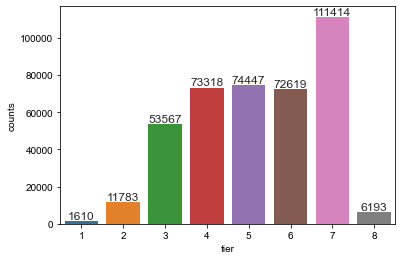

In [65]:
calculate_plot_bar(data_merged, 'tier')

In [15]:
data_merged.to_csv('../data/preprocessed/dataset_merged.csv', index=None)

## Normal preprocess

In [12]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')

In [13]:
X_features = list(set(data.columns) - {'tier'})
percents = ['percent_boost_speed', 'percent_supersonic_speed', 'percent_low_air', 'percent_high_air',
            'percent_boost_0_25', 'percent_boost_25_50', 'percent_boost_50_75', 'percent_full_boost', 'percent_zero_boost',
            'percent_farthest_from_ball', 'percent_closest_to_ball', 'percent_most_forward', 'percent_most_back', 'percent_infront_ball',
            'percent_neutral_third', 'percent_offensive_third']
remaining = list(set(X_features) - set(percents))
print(remaining)

['avg_distance_to_mates', 'amount_stolen_big', 'amount_used_while_supersonic', 'count_powerslide', 'amount_overfill_stolen', 'amount_stolen_small', 'saves', 'avg_powerslide_duration', 'amount_collected_small', 'avg_distance_to_ball_possession', 'amount_overfill', 'avg_distance_to_ball_no_possession', 'amount_collected_big', 'time_neutral_third', 'score', 'shots_against', 'inflicted', 'bpm', 'taken', 'shooting_percentage', 'shots', 'time_closest_to_ball', 'time_boost_speed']


In [14]:
data_preprocessed = data.copy()

data_preprocessed[percents] /= 100

data_preprocessed[remaining] = RobustScaler().fit_transform(data_preprocessed[remaining])
data_preprocessed.describe()

,shots,shots_against,saves,score,shooting_percentage,bpm,amount_collected_big,amount_stolen_big,amount_collected_small,amount_stolen_small,...,percent_offensive_third,percent_neutral_third,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,tier
count,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,...,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000,404951.000000
mean,0.045483,0.075023,-0.021931,0.082566,0.233522,-0.057821,-0.002323,0.127425,0.043820,0.095158,...,0.203353,0.298146,0.282106,0.347117,0.337388,0.337060,0.346985,0.632669,0.626666,14.749960
std,0.789552,0.777282,0.532476,0.752797,0.771711,0.708790,0.746011,0.793484,0.808688,0.801799,...,0.061631,0.046655,0.060833,0.079459,0.067091,0.060549,0.072563,0.968222,0.879370,4.551041
min,-1.000000,-1.500000,-0.500000,-1.342995,-0.400000,-2.731092,-1.768688,-0.889401,-2.048980,-1.452632,...,0.000000,0.000000,0.000000,0.002219,0.000724,0.002178,0.002917,0.000000,0.000000,1.000000
25%,-0.500000,-0.500000,-0.500000,-0.463768,-0.400000,-0.546218,-0.519041,-0.437788,-0.485714,-0.452632,...,0.162986,0.269763,0.242892,0.295709,0.294324,0.299506,0.300579,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.201428,0.299025,0.280473,0.342576,0.334752,0.334670,0.342675,0.000000,0.000000,15.000000
75%,0.500000,0.500000,0.500000,0.536232,0.600000,0.453782,0.480959,0.562212,0.514286,0.547368,...,0.241639,0.328149,0.319533,0.392515,0.377178,0.371397,0.387638,1.000000,1.000000,19.000000
max,8.000000,8.250000,5.000000,8.942029,9.600000,4.126050,7.428773,7.898618,11.322449,11.063158,...,0.848047,0.821405,1.000000,1.147396,1.517857,1.267857,1.178572,43.000000,29.000000,22.000000


In [15]:
data_preprocessed.to_csv('../data/preprocessed/dataset_normal_preprocessed.csv', index=None)

## Factor Analysis

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

In [17]:
data = pd.read_csv('../data/preprocessed/dataset_selected.csv')
y = data.drop('tier', axis=1, inplace=True)

In [18]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(11690310.614157414, 0.0)

In [19]:
kmo_all, kmo_model = calculate_kmo(data)
kmo_model

0.7315046715982764

In [20]:
fa = FactorAnalyzer(n_factors=data.shape[1], rotation=None)
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.86121376, 4.19023365, 3.09559469, 2.61812978, 1.90967927,
       1.84889784, 1.73320497, 1.30895063, 1.18354433, 0.97092501,
       0.96004153, 0.88166477, 0.84090014, 0.81204991, 0.76919819,
       0.72310255, 0.69634658, 0.68567705, 0.63917834, 0.59790137,
       0.57734139, 0.5523421 , 0.46272504, 0.38377411, 0.36890521,
       0.32050559, 0.3155141 , 0.28547335, 0.26959074, 0.23175667,
       0.18563525, 0.18236005, 0.14768004, 0.12336671, 0.11643889,
       0.08103141, 0.03430296, 0.02339627, 0.01142574])

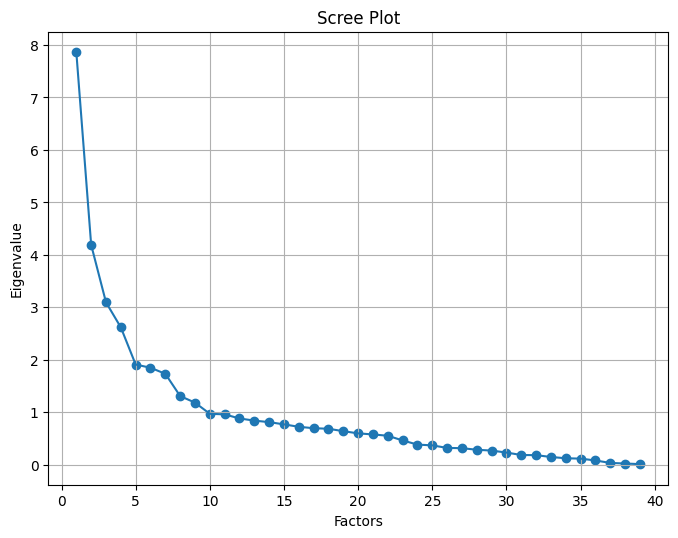

In [21]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig("../docs/res/imgs/scree.pdf", format='pdf')
plt.show()

9 eigen values above 1

In [22]:
fa = FactorAnalyzer(n_factors=10, rotation="varimax")
fa.fit(data)

FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})

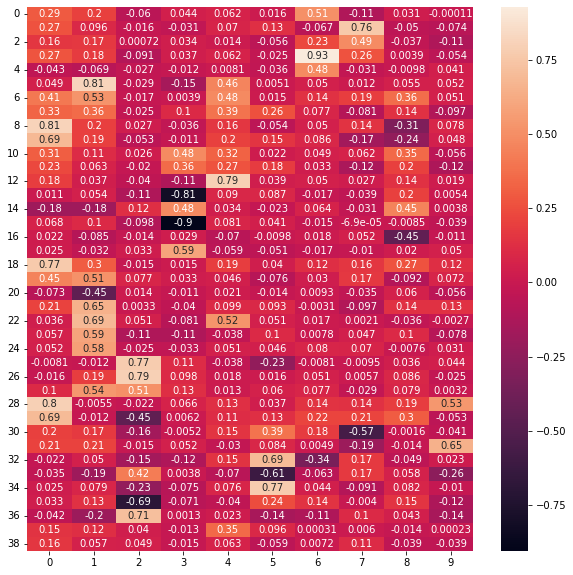

In [23]:
ax = sns.heatmap(fa.loadings_, annot=True)
ax.figure.set_size_inches(10, 10)

In [24]:
from IPython.display import display, HTML
series = []
with pd.option_context('expand_frame_repr', False):
    for index, row in pd.DataFrame(fa.loadings_.T, columns=data.columns).iterrows():
        serie = row[row.abs() > 0.5].sort_values().to_frame().T
        html = HTML(serie.style.to_html())
        display(html)
        series.append(serie)
        
# top = """
# <!DOCTYPE html>
# <html>
# <head>
#   <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css/bootstrap.min.css">
# </head>
# <body>
# """
        
# bottom = """
# <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css/bootstrap.min.css">

# </body>
# </html>
# """
# with open('factors.html', 'w') as f:
#     f.write(top)
#     for html in htmls:
#         # html_data, metadata = get_ipython().display_formatter.format(html)
#         f.write(html.data) 

,amount_stolen_small,time_closest_to_ball,time_boost_speed,time_neutral_third,amount_collected_small
0,0.689219,0.692566,0.769221,0.797393,0.806216


,count_powerslide,amount_collected_big,avg_distance_to_mates,percent_high_air,percent_low_air,percent_boost_speed,percent_supersonic_speed,bpm
1,0.512581,0.526192,0.536195,0.576172,0.591752,0.650090,0.685064,0.813051


,percent_closest_to_ball,avg_distance_to_mates,percent_farthest_from_ball,avg_distance_to_ball_possession,avg_distance_to_ball_no_possession
2,-0.690168,0.510420,0.713832,0.770036,0.794530


,percent_boost_0_25,percent_zero_boost,percent_boost_50_75
3,-0.903611,-0.813483,0.593761


,percent_supersonic_speed,amount_used_while_supersonic
4,0.523532,0.792025


,percent_most_back,percent_infront_ball,percent_most_forward
5,-0.614807,0.694443,0.771627


,shots,score
6,0.510131,0.926897


,percent_offensive_third,shots_against
7,-0.569624,0.757281


8


,time_neutral_third,percent_neutral_third
9,0.533742,0.648458


In [25]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4,5,6,7,8,9
0,3.990194,3.967808,3.033831,2.562845,2.035809,1.973254,1.737946,1.599323,1.227979,0.931421
1,0.102313,0.101739,0.077791,0.065714,0.052200,0.050596,0.044563,0.041008,0.031487,0.023883
2,0.102313,0.204051,0.281842,0.347556,0.399756,0.450352,0.494915,0.535923,0.567410,0.591293


In [26]:
data_factored = pd.DataFrame(fa.transform(data))

In [27]:
data_factored

,0,1,2,3,4,5,6,7,8,9
0,-0.238399,-2.644142,-1.066050,-6.969409,-0.644257,0.978088,-1.799285,0.042436,2.412266,1.088186
1,0.723737,-3.319654,-0.095133,-1.614939,0.024788,0.708036,0.055853,-1.966154,0.950711,0.377605
2,-1.578455,-0.231002,2.243832,-0.660815,0.734241,0.590141,-0.978252,-1.282099,0.430366,-1.465802
3,-1.419455,-1.592573,-1.096440,-2.706258,1.174238,1.662010,0.434549,1.193768,-1.145232,0.542714
4,1.356836,-1.743276,-1.061420,-0.224487,-0.316925,0.735591,-2.031383,2.063536,1.073384,-3.884341
...,...,...,...,...,...,...,...,...,...,...
404946,0.178981,-2.403714,0.613385,-0.733372,0.351456,-0.061667,-0.024138,0.185401,-0.453944,1.322441
404947,0.669681,-1.385228,-0.427948,-1.076165,-1.060528,0.628264,-0.501734,0.133013,0.002674,1.658733
404948,-0.413796,-2.270023,0.103623,-1.626552,0.728293,-0.771623,0.789654,-0.674835,-0.851262,-0.615476
404949,-0.702997,-1.549475,-1.303942,1.383410,-0.991942,0.312568,0.799203,-0.136335,1.156905,0.007276


In [30]:
data_factored['tier'] = pd.read_csv('../data/preprocessed/dataset_selected.csv')['tier']
data_factored.to_csv('../data/preprocessed/dataset_factored.csv', index=None)